Given list of stock tickers and investment amount, return the predicted value in 2017. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

In [51]:
ticker_list = ["TMO", "FOX", "AMZN","AAPL","GM","IBM","TWTR","CBS","TM","BIO"]
dataframe_dictionary = {}
for ticker in ticker_list:
    dataframe_dictionary[ticker] = pd.read_csv("http://www.google.com/finance/historical?output=csv&q={}&startdate=2000-01-01&enddate=2017-01-01".format(ticker), encoding = "utf-8")

In [52]:
AMZN_df = pd.DataFrame(dataframe_dictionary["AMZN"])
AMZN_df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
AMZN_df["Average Price"] = AMZN_df.drop("Volume", axis = 1).mean(axis = 1)
AMZN_df.index = AMZN_df["Date"].apply(pd.to_datetime).values
AMZN_df.drop(labels =["Volume", "Open", "High", "Low", "Close", "Date"], axis = 1, inplace = True)
AMZN_df.sort_index(inplace = True)

In [53]:
AAPL_df = pd.DataFrame(dataframe_dictionary["BIO"])
AAPL_df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
AAPL_df["Average Price"] = AAPL_df.drop("Volume", axis = 1).mean(axis = 1)
AAPL_df.index = AAPL_df["Date"].apply(pd.to_datetime).values
AAPL_df.drop(labels =["Volume", "Open", "High", "Low", "Close", "Date"], axis = 1, inplace = True)
AAPL_df.sort_index(inplace = True)

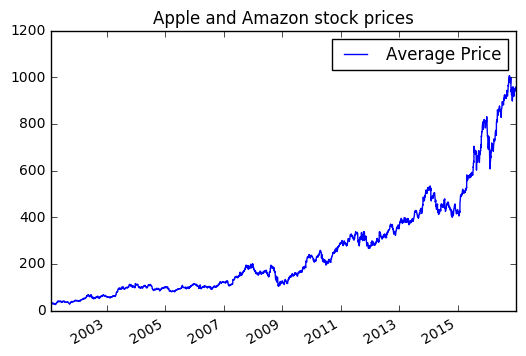

In [123]:
(AMZN_df + AAPL_df).plot()
plt.title("Apple and Amazon stock prices")
plt.show()

In [99]:
log_index_prices = (AMZN_df + AAPL_df).apply(np.log)
log_index_prices.dropna(inplace = True)

//anaconda/lib/python3.5/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


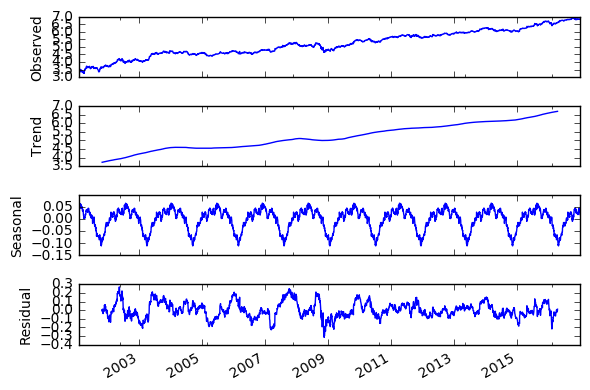

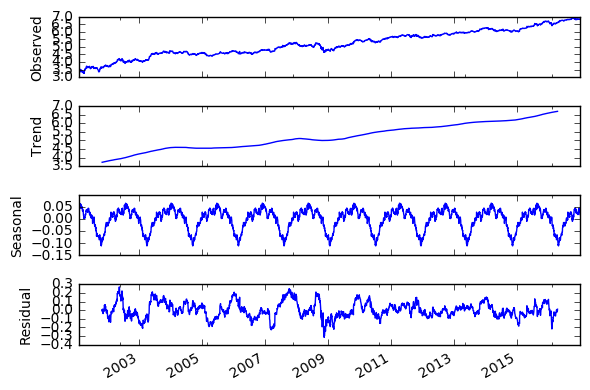

In [121]:
import statsmodels.api as sm

log_index_prices.interpolate(inplace=True)

res = sm.tsa.seasonal_decompose(log_index_prices, freq = 365)
res.plot()

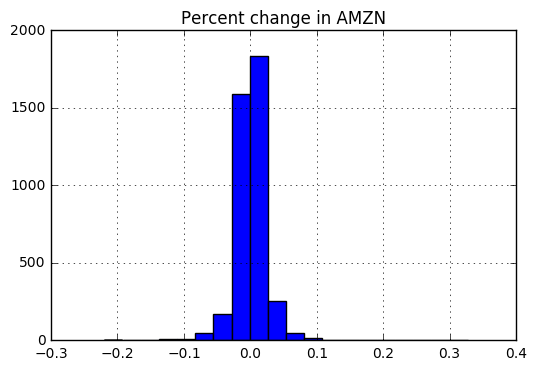

In [38]:
df[["Average Price"]].pct_change().hist(bins = 20)
plt.title("Percent change in AMZN")

In [11]:
AAPL_data = pd.DataFrame(dataframe_dictionary["AAPL"])

# Set date column as the index
AAPL_data.index = pd.to_datetime(AAPL_data.iloc[:, 0].values)

# Convert all columns to numeric values
AAPL_data = AAPL_data.apply(pd.to_numeric, errors = "coerce")

# Drop the Time column
AAPL_data.dropna(axis = 1, inplace = True)

# Sort the values
AAPL_data.sort_index(inplace = True)

# Finding the average prices
AAPL_data["Daily Average"] = AAPL_data.drop("Volume", axis = 1).apply(np.mean, axis = 1).values

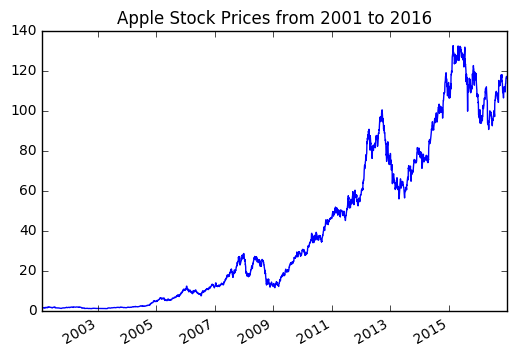

In [12]:
AAPL_data["Daily Average"].plot()
plt.title("Apple Stock Prices from 2001 to 2016")
plt.show()

In [13]:
GOOG_data = dataframe_dictionary["GOOG"]
# Set date column as the index
GOOG_data.index = pd.to_datetime(GOOG_data.iloc[:, 0].values)
GOOG_data = GOOG_data.apply(pd.to_numeric, errors = "coerce")
GOOG_data.dropna(axis = 1, inplace = True)
GOOG_data.sort_index(inplace = True)
GOOG_data["Daily Average"] = GOOG_data.apply(np.mean, axis = 1).values

KeyError: 'GOOG'

In [ ]:
GOOG_data["Daily Average"].plot()
plt.title("Daily Google Prices from 2001 to 2016")
plt.show()

In [ ]:
pd.tools.plotting.autocorrelation_plot(AAPL_data.Close)
plt.show()
pd.tools.plotting.autocorrelation_plot(GOOG_data.Close)
plt.show()

In [ ]:
earliest_date = np.min([AAPL_data.index.min(), GOOG_data.index.min()])
GOOG_fill_data = pd.date_range(start = earliest_date, end = GOOG_data.index.min(), freq ="B")
GOOG_data = pd.concat(objs=[pd.DataFrame(index = GOOG_fill_data), GOOG_data]).fillna(0)

In [ ]:
stock_index = (GOOG_data["Daily Average"] + AAPL_data["Daily Average"])
stock